<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20based%20on%20UNSW-NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest (RF) based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.shape
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [5]:
dataset["Class"].unique()

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

In [6]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


**Data Preprocessing**

In [8]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.000000e+00 1.214780e-01 6.000000e+00 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [2.000000e+00 6.499020e-01 1.400000e+01 ... 1.000000e+00 6.000000e+00
  0.000000e+00]
 [3.000000e+00 1.623129e+00 8.000000e+00 ... 2.000000e+00 6.000000e+00
  0.000000e+00]
 ...
 [1.753390e+05 9.000000e-06 2.000000e+00 ... 3.000000e+00 1.200000e+01
  0.000000e+00]
 [1.753400e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]
 [1.753410e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]]
[0 0 0 ... 6 6 6]


In [9]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 2: 56000, 1: 56000, 5: 56000, 8: 56000, 7: 56000, 4: 56000, 3: 56000, 9: 56000, 6: 56000})


In [11]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest (RF) for 10 class classifications**

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Random Forest


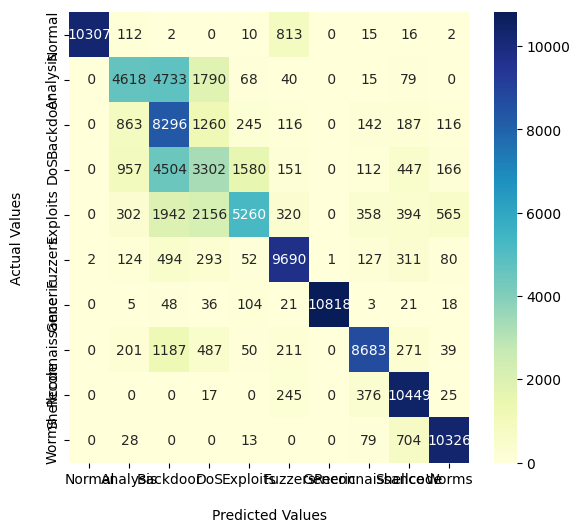

In [14]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [16]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 72.99017857142857
Precision : 75.24146028311007
Recall : 72.99017857142857
F1-Score : 0.7292882652966145


In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[10307   112     2     0    10   813     0    15    16     2]
 [    0  4618  4733  1790    68    40     0    15    79     0]
 [    0   863  8296  1260   245   116     0   142   187   116]
 [    0   957  4504  3302  1580   151     0   112   447   166]
 [    0   302  1942  2156  5260   320     0   358   394   565]
 [    2   124   494   293    52  9690     1   127   311    80]
 [    0     5    48    36   104    21 10818     3    21    18]
 [    0   201  1187   487    50   211     0  8683   271    39]
 [    0     0     0    17     0   245     0   376 10449    25]
 [    0    28     0     0    13     0     0    79   704 10326]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11277
           1       0.64      0.41      0.50     11343
           2       0.39      0.74      0.51     11225
           3       0.35      0.29      0.32     11219
           4       0.71      0.47      0.56     11297
   